<a href="https://colab.research.google.com/github/BouazizFortas95/Applying-Course-DL/blob/main/ApplyCoursDL_ex5_classificationDogs%26Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**For this specific example** of image classification **(cats vs. dogs)**, you can use a Deep Neural Network to started setting one  by using a Flatten layer as the input.

However, for image data, Deep Neural Networks are generally not as effective as Convolutional Neural Networks (CNNs). Here's why:

1.  ***Spatial Information:*** DNNs treat each pixel as an independent feature after
flattening, losing the spatial relationships between neighboring pixels which are crucial for understanding images.
2.  ***Feature Hierarchy:*** CNNs are designed to automatically learn a hierarchy of features, from simple edges and corners in early layers to more complex objects in deeper layers. DNNs don't have this inherent capability.

While the current DNN model can work, a CNN would typically yield better performance for this type of image classification task by leveraging the spatial structure of the images.

First, we need to download the dataset. We can use `wget` to download the zip file directly from the Microsoft website.

In [ ]:
!wget https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip

--2025-07-29 19:48:35--  https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.245.101, 2a02:26f0:6d00:3b6::317f, 2a02:26f0:6d00:39f::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.36.245.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   135MB/s    in 10s     

2025-07-29 19:48:45 (75.5 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



Next, we'll unzip the downloaded file.

In [ ]:
!unzip -q kagglecatsanddogs_5340.zip -d .

In [ ]:
pip install opencv-python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

The dataset is extracted into a directory named `PetImages`. Now, your existing code should be able to find the images.

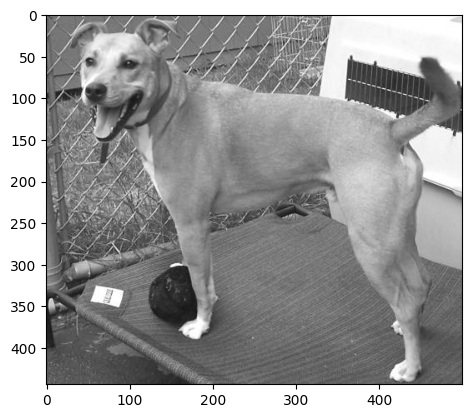

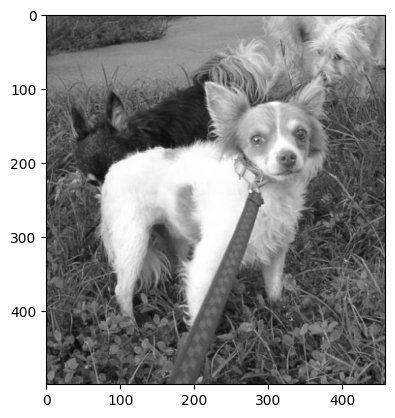

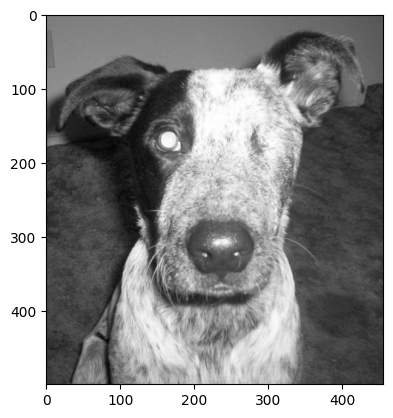

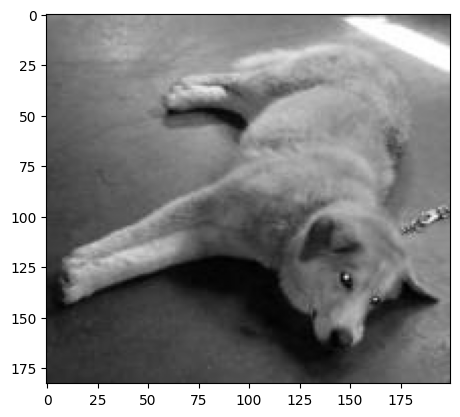

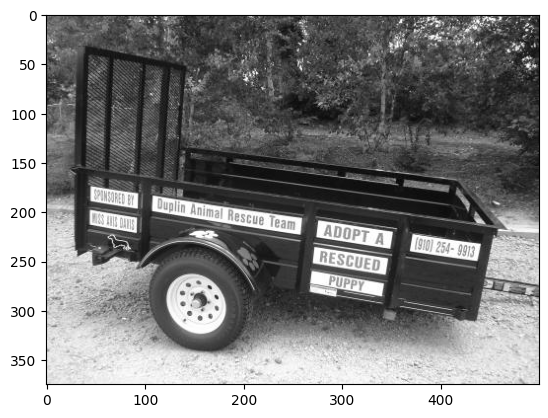

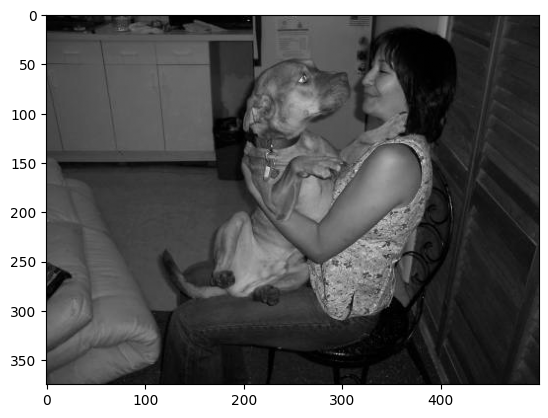

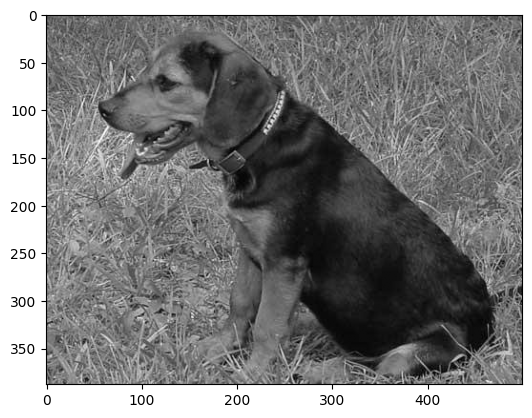

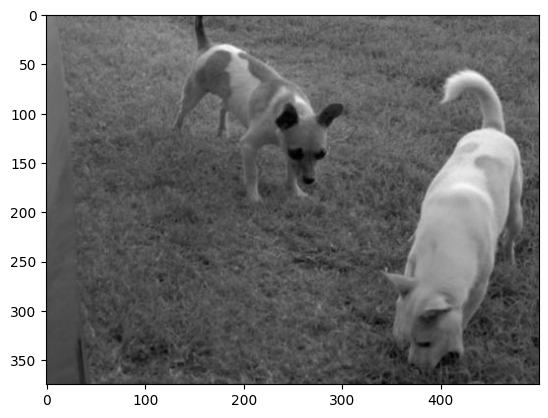

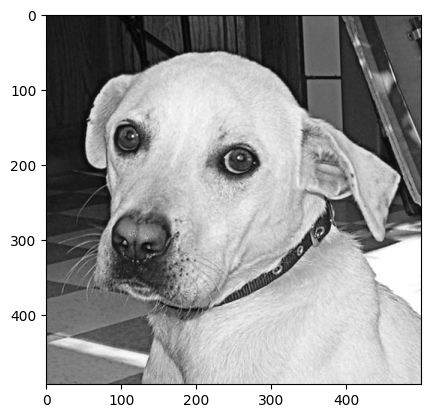

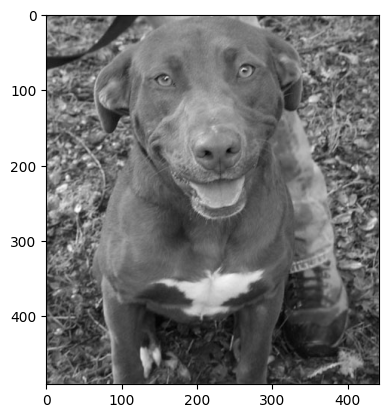

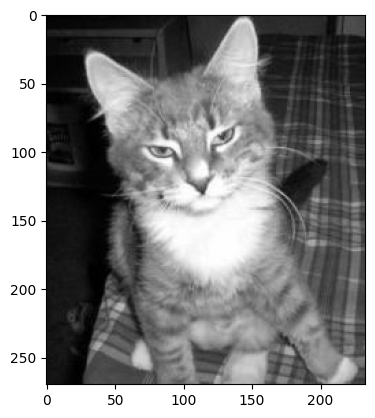

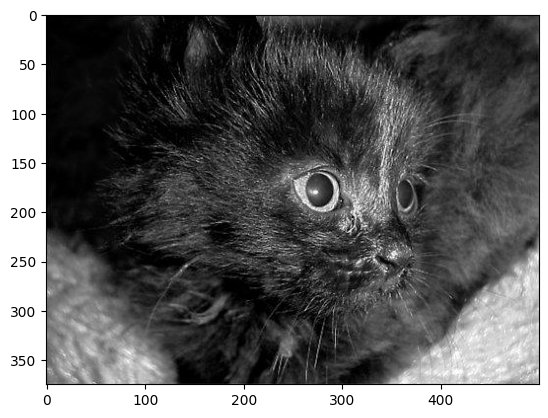

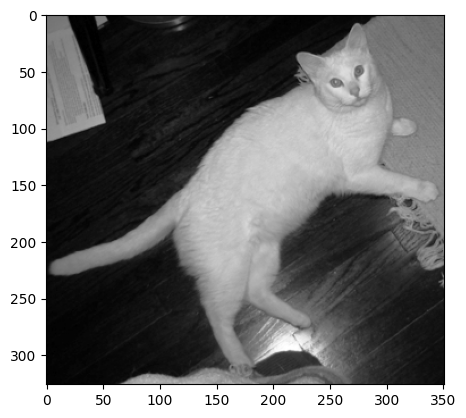

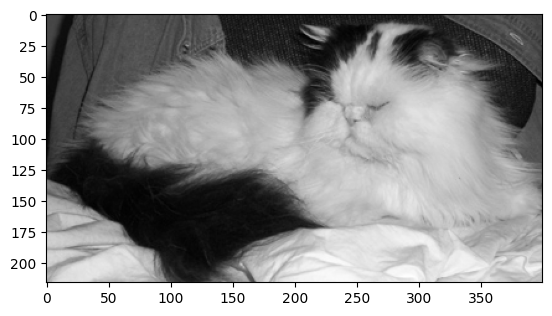

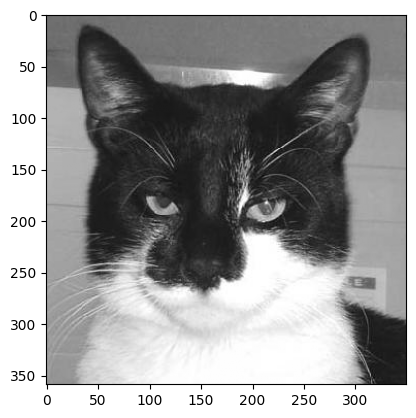

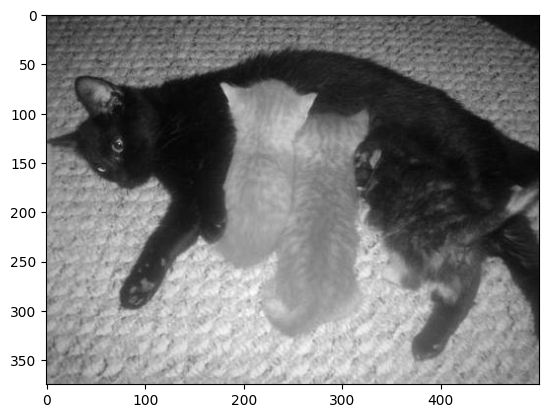

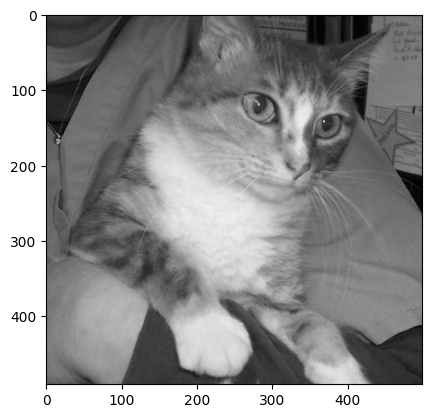

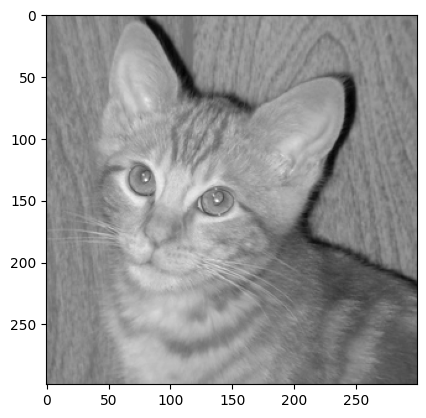

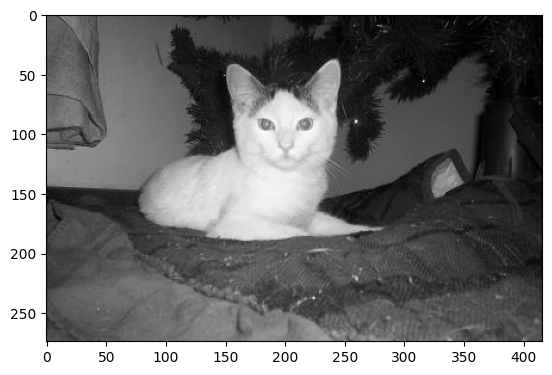

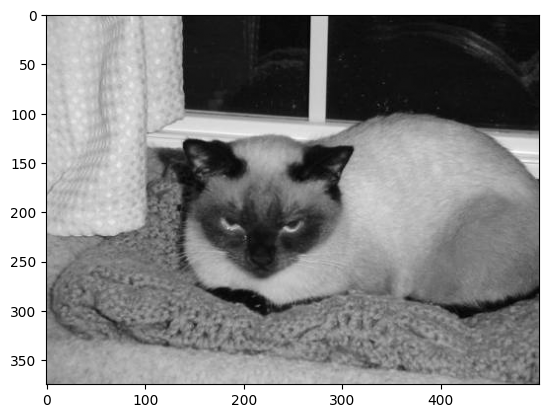

In [ ]:
DATADIR = 'PetImages'
CATEGORIES = ["Dog", "Cat"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    x = 0
    for img in os.listdir(path):
        x = x + 1
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        if x == 10:
            break

In [ ]:
print(img_array.shape)

(375, 500)


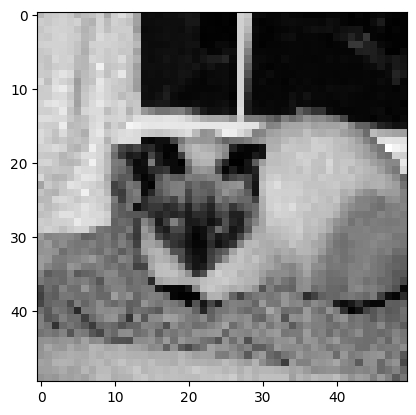

In [ ]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            # Skip known problematic files (can add more here if needed)
            if img == '11701.jpg' and category == 'Dog':
                continue
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_array is not None and img_array.shape is not None and len(img_array.shape) > 0:
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    training_data.append([new_array, class_num])
            except cv2.error as e:
                print(f"CV2 error processing image {img} in category {category}: {e}")
                pass # Continue to the next image if a cv2 error occurs
            except Exception as e:
                print(f"An unexpected error occurred processing image {img} in category {category}: {e}")
                pass

create_training_data()

100%|██████████| 12501/12501 [00:10<00:00, 1163.92it/s]


In [ ]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
0
1
0
1
1
1
1
0
0


In [ ]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

# Convert X to a NumPy array and then reshape it
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

print(X[0].shape)

(50, 50, 1)


In [ ]:
import pickle

In [ ]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close() # Added missing parentheses

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=3)

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5000 - loss: 0.7002
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4964 - loss: 0.6983
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4943 - loss: 0.6970


In [ ]:
test_loss, test_acc = model.evaluate(X, y)
print('Test accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8455 - loss: 0.6487
Test accuracy: 0.5000200271606445
